In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn
from sklearn import datasets

moon_data, moon_labels = sklearn.datasets.make_moons(n_samples=1000, noise=0.25, random_state=53)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(moon_data,moon_labels, test_size=0.2)

### Voting Classifiers

In [63]:

log_clf = LogisticRegression()
forest_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
    estimators = [('log', log_clf),('forest', forest_clf),('svm', svm_clf)],
    voting = 'soft'
)
voting_clf.fit(X_train,y_train)
for clf in (log_clf, forest_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train)
    preds = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, preds))

LogisticRegression 0.835
RandomForestClassifier 0.93
SVC 0.925
VotingClassifier 0.92


### Bagging and pasting

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, 
    max_samples = 100, bootstrap =True, n_jobs= -1, 
)
bag_clf.fit(X_train,y_train)
dec_tree_clf = DecisionTreeClassifier()
dec_tree_clf.fit(X_train,y_train)
preds = bag_clf.predict(X_test)
preds_dec_tree = dec_tree_clf.predict(X_test)

In [65]:
print(accuracy_score(y_test, preds))
print(accuracy_score(y_test, preds_dec_tree))

0.93
0.905


In [66]:
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [67]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

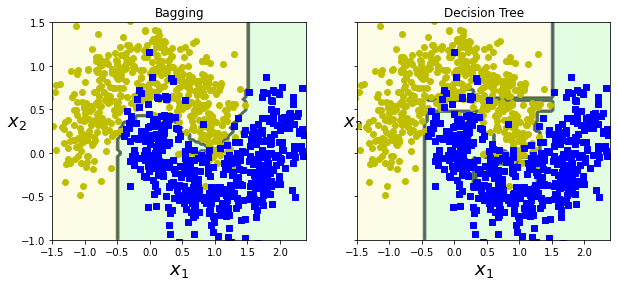

In [68]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(bag_clf, moon_data, moon_labels, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Bagging")
plt.sca(axes[1])
plot_decision_boundary(dec_tree_clf, moon_data, moon_labels, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Decision Tree")
plt.show()

### Random Forests

In [72]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
preds = rnd_clf.predict(X_test)
print(accuracy_score(y_test,preds))

0.93


In [73]:
from sklearn.ensemble import ExtraTreesClassifier
rnd_clf = ExtraTreesClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
preds = rnd_clf.predict(X_test)
print(accuracy_score(y_test,preds))

0.915


### Feature Importance

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators = 500,n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09290068550967033
sepal width (cm) 0.0224444887280218
petal length (cm) 0.45348675351596524
petal width (cm) 0.43116807224634274


In [83]:
from sklearn.datasets import fetch_openml
mnist_data, mnist_labels = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
xmnist_train,xmnist_test, ymnist_train, ymnist_test =  sklearn.model_selection.train_test_split(mnist_data,mnist_labels, test_size=0.2)

In [77]:
rnd_clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rnd_clf.fit(xmnist_train,ymnist_train)

RandomForestClassifier(n_jobs=-1)

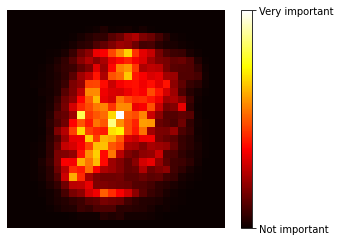

In [91]:
import matplotlib
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

### Boosting

In [92]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm = "SAMME.R", learning_rate =0.5)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [93]:
preds = ada_clf.predict(X_test)
print(accuracy_score(y_test,preds))

0.925


In [158]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X_train = np.random.rand(100, 1) - 0.5
y_train = 3*X_train[:, 0]**2 + 0.05 * np.random.randn(100)
X_train,X_test,y_train,y_test =  sklearn.model_selection.train_test_split(X_train,y_train, test_size=0.2)
tree_reg1 = DecisionTreeRegressor(max_depth= 2)
tree_reg1.fit(X_train,y_train)
y_2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth= 2)
tree_reg2.fit(X_train,y_2)
y_3 = y_train - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth= 2)
tree_reg3.fit(X_train,y_3)
preds =  sum(tree.predict(X_test)for tree in(tree_reg1,tree_reg2,tree_reg3))

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 1)
gbrt.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=200)

### Early Stopping

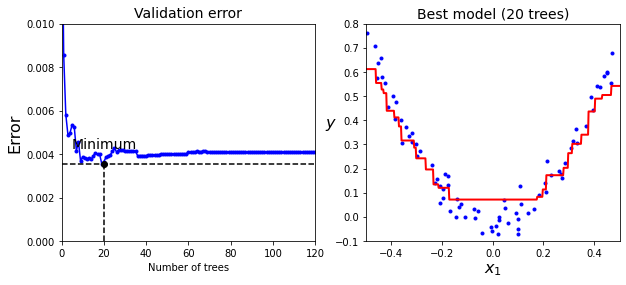

In [174]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 1)
gbrt.fit(X_train,y_train)
errors = [mean_squared_error(y_test, y_pred)for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors)+1
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)
min_error = np.min(errors)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X_train, y_train, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

In [175]:
gbrt = GradientBoostingRegressor(max_depth =2 , n_estimators =200, learning_rate = 1)

In [176]:
min_error = 999999999
error_up = 0
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True, subsample = 0.25)
for n_est in range(1,150):
    gbrt.n_estimators = n_est
    gbrt.fit(X_train,y_train)
    preds = gbrt.predict(X_test)
    test_err = mean_squared_error(y_test,preds)
    if test_err < min_error: min_error = test_err
    else: error_up += 1
    if error_up ==5 :
        break
print(gbrt.n_estimators)


43


### XGBoost

In [177]:
import xgboost
xgb_reg =xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train, eval_set=[(X_test, y_test)], early_stopping_rounds =2)
preds = xgb_reg.predict(X_test)
print(mean_squared_error(preds,y_test))

[0]	validation_0-rmse:0.19347
[1]	validation_0-rmse:0.14803
[2]	validation_0-rmse:0.11188
[3]	validation_0-rmse:0.09043
[4]	validation_0-rmse:0.07736
[5]	validation_0-rmse:0.06909
[6]	validation_0-rmse:0.06420
[7]	validation_0-rmse:0.06141
[8]	validation_0-rmse:0.05980
[9]	validation_0-rmse:0.06021
[10]	validation_0-rmse:0.05970
[11]	validation_0-rmse:0.06020
[12]	validation_0-rmse:0.06037
0.0035641637462076824


In [178]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0],axes[1], 500).reshape(-1, 1)
    preds = sum(regressor.predict(x1) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, preds, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

array([0.18676157, 0.60427162, 0.48882102, 0.68951556, 0.16605161,
       0.55592656, 0.20629389, 0.05844896, 0.02295508, 0.61200235,
       0.4268297 , 0.19877932, 0.28320074, 0.21608677, 0.60876529,
       0.40747292, 0.34398593, 0.73528779, 0.75026781, 0.06929893])

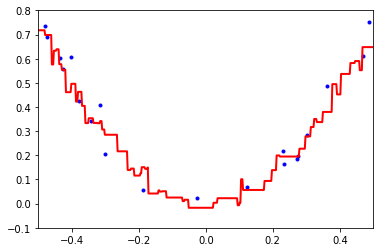

In [179]:
plot_predictions([xgb_reg],X_test,y_test, axes=[-0.5, 0.5, -0.1, 0.8])
y_test

## Exercises

#### Yes, as long as models a

#### Hard voting - majority vote
#### Soft voting - highest probability mean

#### Bagging-Pasting-RandomForests-Stacking yes
#### Boosting no

#### Free validation set

#### Subset of features, sampled, this causes randomness
#### Yes, faster because less features

#### Learning Rate

#### Decrease 

### Load MNIST and make an Ensemble, RandomForest, ExtraTrees, SVM
### Check Performance

### Use previous models to make a stacked ensemble, compare predictions